# Modelo IS-LM

##### Pablo Reyes y Maria Victoria Vargas







Definimos la ecuacion de la Is de la siguiente manera:
$$i_{1}=\frac{C_{0}+I_{0}+G}{b} - \frac{(1-c(1-t))Y}{b}$$

Donde: $C_{0}$ es el consumo autonomo;
       $I_{0}$ son los efectos del capital sobre la eficiencia marginal;
       $G$ es el consumo del gobierno;
       $c$ es la propencion marginal a consumir;
       $t$ es la tasa de impuestos del gobierno;
       $Y$ es el nivel de producto de la economia;
       $b$ es una constante;

Como hemos visto en nuestros cursos de macroeconomia esta curva corresponde a toda combinacion de puntos entre la tasa de interes y el producto que genera un equilibrio en el mercado de bienes de la economia.

Algunos aspectos importantes para tener en cuenta es que, la pendiente de la curva IS esta determinada por: $c$ la propencion marginal a consumir, $t$ la tasa de impuestos del estado y la relacion de la inversion sobre la tasa de interes

Minetras que la curva IS sufre desplazamientos sobre el plano a cambios en: El gasto publico $G$; el consumo autonomo de los agentes $C_{0}$ y la eficiencia marginal del capital $I_{0}$

Por otro lado definimos la curva LM de con la siguiente relacion:

$$i_{2}=\frac{k}{h}Y -\frac{1}{h}\frac{\bar{M}}{P}$$

Donde: $k$ es un parametro que representa la sensibilidad de la demanda de dinero con respecto al ingreso;
       $h$ es otro parametro que representa la sensibilidad de demanda de dinero con respecto a la tasa de interes;
       $Y$ es el nivel de producto de la economia;
       $\frac{\bar{M}}{P}$ es la oferta de dinero en la economia para cualquier nivel de precios (recordemos que el precio es una variable exogena al modelo);

Entonces, la curva LM representa toda combinacion de tasa de interes y nivel de producto para la cual la demanda de dinero ($M_{d}$) es igual a la oferta de dinero ($\frac{\bar{M}}{P}$)

##### El punto mas importante para este modelo es el punto donde la curva de equilibrio IS y la curva de equilibrio LM cortan. En este punto logramos encontrar la tasa de interes y el nivel de producto que genera un equilibrio tanto en el mercado de bienes como en el mercado de dinero.

Para encontrar este punto nos disponemos a igular ambas ecuaciones:

$$ IS = LM = i_{1} = i_{2}$$

$$ \frac{C_{0}+I_{0}+G}{b} - \frac{(1-c(1-t))Y}{b} = \frac{k}{h}Y -\frac{1}{h}\frac{\bar{M}}{\bar{P}}$$

Despejando para Y encontramos el nivel de producto optimo:

$$Y^{*} = \frac{(C_{0}+I_{0}+G)h}{(kb-(1-c(1-t))h)} + \frac{b\bar{M}}{\bar{P}(kb-(1-c(1-t))h)}$$

y remplazando esta ecuacion en la IS o LM encontramos el nivel de tasa de interes de equilibrio:

$$i^{*}=\frac{k}{h}Y^{*} -\frac{1}{h}\frac{\bar{M}}{\bar{P}}$$



Con esto captamos la escencia basica del modelo IS-LM; pero si queremos ir mas lejos podemos definir el mercadode donde sale la curva LM (mercado de dinero) de la siguiente manera:

$$ M_{o} = \frac{\bar{M}}{\bar{P}}$$

$M_{d}$ como ya dijimos antes este componente es la demanda de dinero o la demanda por salarios reales, y en el modelo Keynesiano clasico esta definida de la siguiente manera:

$$ M_{d} = \frac{k}{\left(1 - c \cdot (1 - t)\right) \cdot h + b \cdot k} \cdot \left(C_{o} + I_{0} + G\right) - m \cdot \frac{1 - c \cdot (1 - t)}{\left(1 - c \cdot (1 - t)\right) \cdot h + b \cdot k}$$



Y como se asume que la oferta de dinero es una constante determinada por el Banco de la Republica entonces el equilibrio en este mercado vendria dado por:

$$\frac{k}{\left(1 - c \cdot (1 - t)\right) \cdot h + b \cdot k} \cdot \left(C_{o} + I_{0} + G\right) - m \cdot \frac{1 - c \cdot (1 - t)}{\left(1 - c \cdot (1 - t)\right) \cdot h + b \cdot k} = \frac{\bar{M}}{P}$$

##### Claramente la tasa de interes que equilibra este mercado es la misma tasa de interes a la que se llega en el modelo IS-LM, cosa que veremos en las graficas

Por ultimo el mercado de la demanda agregada, de donde viene determinada la curva IS, viene determinada por la funcion clasica propuesta por Kaynes:

$$Y = \left(I_{o} - bi \right) + G + \left(C_{o} + Y \cdot c(1 - t)\right)$$

La oferta en este ejercicios asumimos que es constante en el nivel de precios, dado que estamos bajo el supuesto de precios no flexibles

$$ OA = \bar{P}$$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class ISLM:
    def __init__(self, Co, Io, G ,b ,c, t, k, h, M , P ):
        self.ConsumoAutonomo=Co #1
        self.EfectosEficiencia=Io #2
        self.GastoPublico=G #3
        self.parametro=b #4
        self.PropoencionConsumir=c #5
        self.TasaImpuestos=t #6
        self.SensibilidadDineroIng=k #7
        self.SensibilidadDineroi=h #8
        self.OfertaDinero=M #9
        self.precios=P #10

    def comprobar(self , clase):
        l1=[i for i in clase.__dict__.values()]
        if 0 < self.TasaImpuestos > 1 or 0 < self.PropoencionConsumir > 1:
            return 'Los parametros tasa de impuesto y Propencion a consumir tienen que estar en el intervalo [0,1]'
        for i in l1:
            if i<0:
                return 'Los parametros no pueden ser negativos'
            else:
                pass
        return 'Parametros ingresados correctamente'

    def CurvaIS(self , Y):
        try:
            return ((self.ConsumoAutonomo+self.EfectosEficiencia+self.GastoPublico)/self.parametro) - (((1-self.PropoencionConsumir*(1-self.TasaImpuestos))*Y)/self.parametro)
        except ZeroDivisionError:
            return 'No se puede dividir por 0'

    CurvaLM = lambda self , Y: ((self.SensibilidadDineroIng/self.SensibilidadDineroi)*Y) - ((1/self.SensibilidadDineroi)*(self.OfertaDinero/self.precios))

    def Equilibrio(self):
        try:
            y_eqlb = (((self.ConsumoAutonomo+self.EfectosEficiencia+self.GastoPublico)*self.SensibilidadDineroi) / (self.SensibilidadDineroIng*self.parametro + (1-self.PropoencionConsumir *(1-self.TasaImpuestos))*self.SensibilidadDineroi)) + self.parametro*self.OfertaDinero/(self.precios*(self.SensibilidadDineroIng*self.parametro + (1-self.PropoencionConsumir *(1-self.TasaImpuestos))*self.SensibilidadDineroi))
            i_eqlb = ((self.SensibilidadDineroIng/self.SensibilidadDineroi)*y_eqlb) - ((1/self.SensibilidadDineroi)*(self.OfertaDinero/self.precios))
            return round(y_eqlb,3), round(i_eqlb,3)
        except ZeroDivisionError:
            return 'No se puede dividir por 0'

    def actualizar(self, parametro , c):
            for i in self.__dict__:
                if i == parametro:
                    self.__dict__[parametro]=c
                    break
            else:
                return 'Ingrese un parametro valido'

    def MercadoDinero(self , m):
        return (self.SensibilidadDineroIng / ((1 - self.PropoencionConsumir * (1 - self.TasaImpuestos)) * self.SensibilidadDineroi + self.parametro * self.SensibilidadDineroIng) * (self.ConsumoAutonomo + self.EfectosEficiencia + self.GastoPublico)) - (m * (1 - self.PropoencionConsumir * (1 - self.TasaImpuestos)) / ((1 - self.PropoencionConsumir * (1 - self.TasaImpuestos)) * self.SensibilidadDineroi + self.parametro * self.SensibilidadDineroIng))


    CurvaDemanda= lambda self, Y , eq=Equilibrio: (self.EfectosEficiencia - self.parametro * eq(self)[1]) + self.GastoPublico + (self.ConsumoAutonomo+ Y * self.PropoencionConsumir * (1 - self.TasaImpuestos))


    def graficar(self,  IS=CurvaIS, LM=CurvaLM, Dinero=MercadoDinero , Demanda=CurvaDemanda ,eq=Equilibrio):
        rango , ymax = 0 , 0

        while rango < eq(self)[0]:
            rango = rango +1

        while ymax < eq(self)[1]:
            ymax = ymax +1

        if eq(self)[1] < 1 and eq(self)[0]<5:
          rango = rango+1
          ymax = 0.5
          ymin = -0.2
        else:
          rango = rango + eq(self)[0]*1.1
          ymax = ymax +  eq(self)[1]*0.8
          ymin = 0


        ejex = np.linspace(0.01, rango , num=60)
        ejeyIS = IS(self,ejex)
        ejeyLM = LM(self,ejex)

        OfertaDinero = self.OfertaDinero / self.precios
        ejeyDinero = Dinero(self,ejex)

        ejeyDemanda = Demanda(self,ejex)

        fig, ((ax1, ax2), (_, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

        ax2.plot(ejex, ejeyIS, linewidth=3, label='Curva IS', color='#00008B')
        ax2.plot(ejex, ejeyLM, linewidth=3, label='Curva LM', color="#FF0000")
        ax2.axvline(x=eq(self)[0], linewidth=2, label='Equilibro Modelo IS - LM', linestyle='--', color='brown')
        ax2.axhline(y=eq(self)[1], linewidth=2, linestyle='--', color='#7f7f7f')
        ax2.plot(eq(self)[0], eq(self)[1], 'go', markersize=10)
        ax2.annotate(f'({eq(self)[0]}, {eq(self)[1]})', (eq(self)[0], eq(self)[1]), textcoords="offset points", xytext=(0, 10), ha='center', color='black', fontweight="bold")
        ax2.set_ylim (ymin,top=ymax)
        ax2.set_xlabel('Nivel de producción', fontweight='bold')
        ax2.set_ylabel('Tasa de interés', fontweight='bold')
        ax2.set_title('Modelo IS-LM')
        ax2.legend()
        ax2.grid(True)

        ax1.plot(ejex, ejeyDinero, linewidth=3, label='Demanda de dinero', color="#00008B")
        ax1.axvline(x=OfertaDinero, linewidth=2, label='Oferta de dinero', color='#FF0000')
        ax1.axhline(y=eq(self)[1], linewidth=2, linestyle='--', color='#7f7f7f' , label='Equilibro Oferta de dinero con demanda')
        ax1.set_ylim (ymin,top=ymax)
        ax1.set_xlabel('Demanda de dinero', fontweight='bold')
        ax1.set_ylabel('Tasa de interés', fontweight='bold')
        ax1.set_title('Mercado de dinero')
        ax1.legend()
        ax1.grid(True)

        ax4.plot(ejex, ejex, linewidth=3, label='Oferta Mercado', color="#FF0000")
        ax4.plot(ejex, ejeyDemanda, linewidth=3, label='Demanda Mercado', color="#00008B")
        ax4.axvline(x=eq(self)[0], linewidth=2, label='Equilibrio demanda con oferta', color='brown' , linestyle='--' )
        ax4.set_xlabel('Nivel de produccion', fontweight='bold')
        ax4.set_ylabel('Nivel de precios', fontweight='bold')
        ax4.set_title('Economia Nacional')
        ax4.legend()
        ax4.grid(True)

        plt.tight_layout()
        plt.show()


    def Choque(self, IS=CurvaIS, LM=CurvaLM, Dinero=MercadoDinero , Demanda=CurvaDemanda ,eq=Equilibrio):
        rango , ymax  =  0 , 0
        while rango < eq(self)[0]:
            rango = rango +1

        while ymax < eq(self)[1]:
            ymax = ymax +1

        if eq(self)[1] < 1 and eq(self)[0]<5:
          rango = rango+1
          ymax = 0.5
          ymin = -0.2
        else:
          rango = rango + eq(self)[0]*1.1
          ymax = ymax +  eq(self)[1]*0.8
          ymin = 0

        ejex = np.linspace(0.01, rango, num=60)
        ejeyIS = IS(self,ejex)
        ejeyLM = LM(self,ejex)

        OfertaDinero = self.OfertaDinero / self.precios
        ejeyDinero = Dinero(self,ejex)

        ejeyDemanda = Demanda(self,ejex)

        try:
          choque= int(input("Que choque quiere modelar. 1 para un choque de politica fiscal 2 para un choque de politica monetaria o 3 para ambos choques"))
        except:
          return "Ingrese un valor numerico"

        while choque != 1 and choque!= 2 and choque != 3:
          choque= int(input("Ingrese un choque valido (1 o 2 o 3)"))

        fig, ((ax1, ax2), (_, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

        ax2.plot(ejex, ejeyIS, linewidth=3, label='Curva IS', color='#00008B')
        ax2.plot(ejex, ejeyLM, linewidth=3, label='Curva LM', color="#FF0000")
        ax2.axvline(x=eq(self)[0], linewidth=2, label='Equilibro Modelo IS - LM', linestyle='--', color='brown')
        ax2.axhline(y=eq(self)[1], linewidth=2, linestyle='--', color='#7f7f7f')
        ax2.set_ylim(ymin, ymax)
        ax2.set_xlabel('Nivel de producción', fontweight='bold')
        ax2.set_ylabel('Tasa de interés', fontweight='bold')
        ax2.set_title('Modelo IS-LM')
        ax2.legend()
        ax2.grid(True)

        ax1.plot(ejex, ejeyDinero, linewidth=3, label='Demanda de dinero', color="#00008B")
        ax1.axvline(x=OfertaDinero, linewidth=2, label='Oferta de dinero', color='#FF0000')
        ax1.axhline(y=eq(self)[1], linewidth=2, linestyle='--', color='#7f7f7f' , label='Equilibro Oferta de dinero con demanda')
        ax1.set_ylim(ymin, ymax)
        ax1.set_xlabel('Demanda de dinero', fontweight='bold')
        ax1.set_ylabel('Tasa de interés', fontweight='bold')
        ax1.set_title('Mercado de dinero')
        ax1.legend()
        ax1.grid(True)

        ax4.plot(ejex, ejex, linewidth=3, label='Oferta Mercado', color="#FF0000")
        ax4.plot(ejex, ejeyDemanda, linewidth=3, label='Demanda Mercado', color="#00008B")
        ax4.axvline(x=eq(self)[0], linewidth=2, label='Equilibrio demanda con oferta', color='brown' , linestyle='--' )
        ax4.set_xlabel('Nivel de produccion', fontweight='bold')
        ax4.set_ylabel('Nivel de precios', fontweight='bold')
        ax4.set_title('Economia Nacional')
        ax4.legend()
        ax4.grid(True)


        if choque == 1:

          n= float(input("Cuanto quiere aumentar o disminuir el gasto publico en %"))
          n=n/100

          self.actualizar('GastoPublico' , self.GastoPublico+(self.GastoPublico*n))
          ejeyIS = IS(self,ejex)
          ejeyDinero = Dinero(self,ejex)
          ejeyDemanda = Demanda(self,ejex)

          ax2.plot(ejex, ejeyIS, linewidth=2, label='Curva Demanda Dinero con choque', color="#00008B" , linestyle="-.")
          ax2.plot(eq(self)[0], eq(self)[1], 'go', markersize=10)
          ax2.annotate(f'({eq(self)[0]}, {eq(self)[1]})', (eq(self)[0], eq(self)[1]), textcoords="offset points", xytext=(0, 17), ha='center', color='black', fontweight="bold")
          ax2.legend()

          ax1.plot(ejex, ejeyDinero, linewidth=2, label='Curva IS con choque ', color='#00008B' , linestyle="-.")
          ax1.legend()

          ax4.plot(ejex, ejeyDemanda, linewidth=2, label='Curva Demanda con choque ', color='#00008B' , linestyle="-.")
          ax4.legend()

          plt.tight_layout()
          plt.show()


        elif choque ==2:

          n= float(input("Cuanto quiere aumentar o disminuir la oferta de dinero en %"))
          n=n/100

          self.actualizar('OfertaDinero' , self.OfertaDinero+(self.OfertaDinero*n))
          ejeyLM = LM(self,ejex)
          ejeyDemanda = Demanda(self,ejex)
          OfertaDinero = self.OfertaDinero/self.precios

          ax2.plot(ejex, ejeyLM, linewidth=2, label='Curva Demanda Dinero con choque', color="#FF0000" , linestyle="-.")
          ax2.plot(eq(self)[0], eq(self)[1], 'go', markersize=10)
          ax2.annotate(f'({eq(self)[0]}, {eq(self)[1]})', (eq(self)[0], eq(self)[1]), textcoords="offset points", xytext=(0, -17), ha='center', color='black', fontweight="bold")
          ax2.legend()

          ax1.axvline(x=OfertaDinero, linewidth=2, color='#FF0000', linestyle="-." , label='Oferta de dinero con choque')
          ax1.legend()

          ax4.plot(ejex, ejeyDemanda, linewidth=2, color='#00008B' , linestyle="-." , label='Curva Demanda con choque ')
          ax4.legend()

          plt.tight_layout()
          plt.show()

        elif choque == 3:
            n1= float(input('Cuanto quiere aumentar aumentar o disminuir la oferta de dinero en %'))
            n2= float(input('Cuanto quiere aumentar aumentar o disminuir el gasto publicoen %'))

            n1 ,n2 = n1/100 , n2/100

            self.actualizar('OfertaDinero' , self.OfertaDinero+(self.OfertaDinero*n1))
            self.actualizar('GastoPublico' , self.GastoPublico+(self.GastoPublico*n2))

            ejeyLM = LM(self,ejex)
            ejeyDemanda = Demanda(self,ejex)
            OfertaDinero = self.OfertaDinero/self.precios

            ax2.plot(ejex, ejeyLM, linewidth=2, color="#FF0000" , linestyle="-.", label='Curva LM con choque')
            ax2.plot(eq(self)[0], eq(self)[1], 'go', markersize=10)
            ax2.annotate(f'({eq(self)[0]}, {eq(self)[1]})', (eq(self)[0], eq(self)[1]), textcoords="offset points", xytext=(0, -10), ha='center', color='black', fontweight="bold")
            ax2.legend()

            ax1.axvline(x=OfertaDinero, linewidth=2, color='#FF0000', linestyle="-." , label='Oferta de dinero con choque')
            ax1.legend()

            ax4.plot(ejex, ejeyDemanda, linewidth=2, color='#00008B' , linestyle="-." , label='Curva Demanda agregada con choque ')
            ax4.legend()

            ejeyIS = IS(self,ejex)
            ejeyDinero = Dinero(self,ejex)
            ejeyDemanda = Demanda(self,ejex)

            ax2.plot(ejex, ejeyIS, linewidth=2, color="#00008B" , linestyle="-." , label='Curva IS con choque')
            ax2.legend()

            ax1.plot(ejex, ejeyDinero, linewidth=2, color='#00008B' , linestyle="-." , label='Curva demanda de dinero con choque ')
            ax1.legend()

            plt.tight_layout()
            plt.show()






#(1:ConsumoAutonomo 2:EfectosEficiencia. 3:GastoPublico. 4:Parametro. 5:PorpencionConsumir. 6:TasaImpuestos.
# 7:SensibilidadDineroIng. 8:SensibilidadDinoeri. 9:OfertaDinero. 10:Precios.)

ejemplo=ISLM(1,1,1,6,0.3,0.8,1,8,4,3)
ejemplo.comprobar(ejemplo)

'Parametros ingresados correctamente'

In [ ]:
ejemplo=ISLM(20,3,6,2,0.7,0.2,1,8,100,3)
ejemplo.comprobar(ejemplo)
ejemplo.Choque()


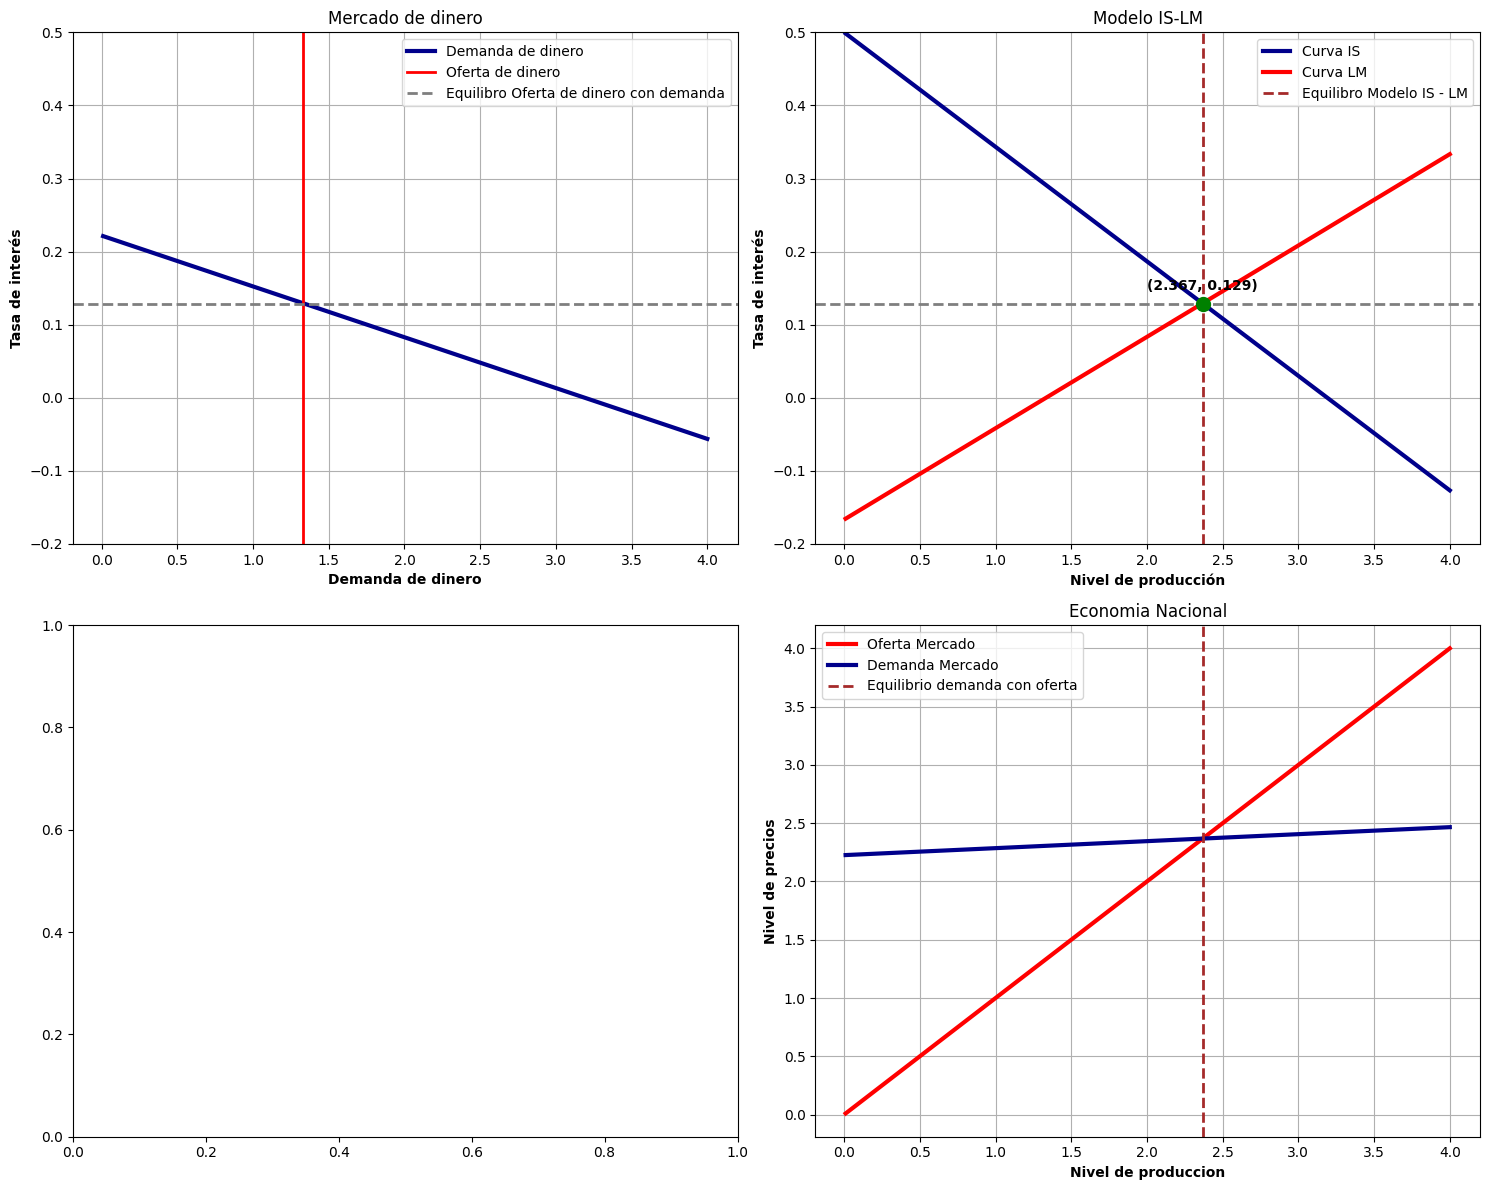

In [ ]:
ejemplo=ISLM(1,1,1,6,0.3,0.8,1,8,4,3)
ejemplo.graficar()

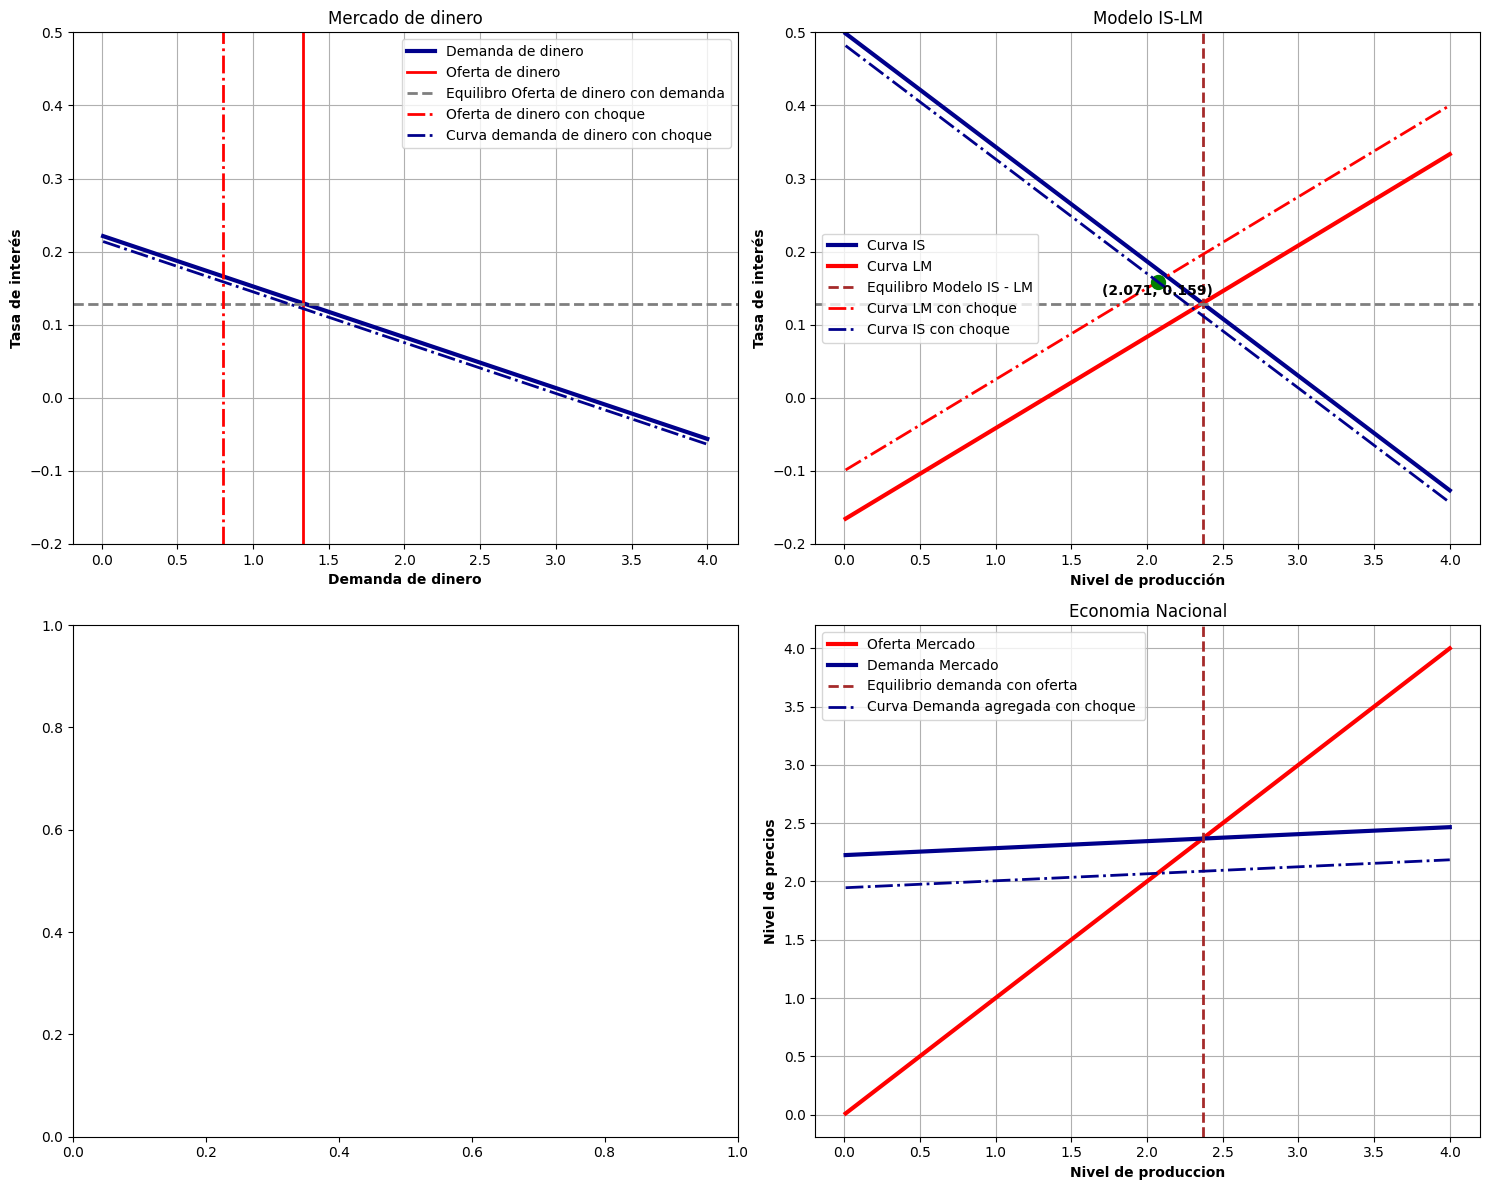

In [ ]:
ejemplo=ISLM(1,1,1,6,0.3,0.8,1,8,4,3)
ejemplo.comprobar(ejemplo)
ejemplo.Choque()

# **Referencia bibliografica**
Jacobo, J. (s.f). Economía Keynesiana. Universidad Externado de Colombia, Facultad de Economía.